For your third capstone, you’ll complete an unsupervised learning project. You can choose your own research question or choose from one below.

How do you achieve the following using clustering techniques?

Netflix wants to identify similar movies based on movie characteristics.  
A company wants to segment its customers.  
Your startup is creating an innovative new email software. How can you help them to create an effective spam filter?  
Your chief marketing officer wants to know how much website traffic is due to spam and bots versus actual customers. How can you group the traffic?  
Your spouse loves fantasy baseball and has a few favorite players. How can you help them to choose who to have on their team?  
Security team in a bank wants to identify fraudulent transactional activities.  


Next steps:  

Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

This will ultimately include the following deliverables:

A Jupyter notebook that tells a compelling story about your data (to be submitted at the end of this checkpoint).
A 15 to 30 minute presentation of your findings. You'll need to produce a deck and present it to the Thinkful community.
Conduct the analysis in Jupyter. Provide a complete research report using the framework introduced in the previous module. The report should include compelling visualizations and actionable insights, telling the story to your intended audience. Walk through the analysis using clean, reproducible code. Include plenty of notes and comments to guide others through your thinking.

Rather than create a deck in a presentation tool like PowerPoint or Google Slides, we will use Jupyter’s built-in slide deck capabilities. This cuts down on the time-consuming and error-prone process of copying-and-pasting into an external program. The presentation is also fully reproducible.

On the day of your presentation, an evaluator from the Thinkful educator team will introduce you, and then you'll give your presentation. Afterward, the evaluator will ask you follow up questions and will grade your performance on your presentation. Members of the audience will also be encouraged to ask follow up questions.

Be prepared to talk about:

Your end-user and the value your project provides to them.
Quantifiable results based on the research you’ve conducted.
The visuals you chose and what they represent for your research.
Next steps you'd take to expand on your work.
A specified research question your model addresses.
How you chose your model specification and what alternatives you compared it to.
The practical uses of your model for an audience of interest.
Any weak points or shortcomings of your model.

In [2755]:
#TODO: Capitalize Global Variables Done!! 15-Apr-2020

# Global Variables
TEST_SIZE              = 0.15 # train_size = 1.00 - test_size
TRAIN_SIZE             = 1.00 - TEST_SIZE
RANDOM_STATE           = 10267347

In [2756]:
#TODO Remove unused imports
#     Group them, OS, SK, Ipython... displays @ end
#     Long core import...

import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt

%matplotlib inline

import chardet
import datetime
from sklearn import datasets, ensemble, metrics, linear_model
from sklearn.utils import shuffle
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
import time, sys
import seaborn as sns
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict, cross_val_score, GridSearchCV,cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from IPython.display import Markdown, display
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import cluster, metrics
from sklearn.pipeline import Pipeline
from sklearn.metrics import pairwise_distances, mean_squared_error
from sklearn.cluster import AffinityPropagation, KMeans, MeanShift, estimate_bandwidth, SpectralClustering
from scipy.spatial.distance import cdist
from sklearn.feature_extraction import FeatureHasher

import spacy
import re
# from nltk.corpus import gutenberg, stopwords
# import nltk
# from nltk.corpus.reader.plaintext import PlaintextCorpusReader
# from nltk.stem import WordNetLemmatizer
# from nltk.cluster import KMeansClusterer
from collections import Counter
import gensim
from gensim.models import Word2Vec
import random
import string
import unicodedata
import codecs
from tqdm import tqdm
import os
import platform

In [2757]:
print("numpy version: {}\npandas version: {}".format(np.__version__,pd.__version__))

numpy version: 1.17.2
pandas version: 1.0.3


In [2758]:
def file_stuff(path, filename, dtypes=None, usecols=None):
    # Use this for stand-alone file
    
#     path = "../../../../"
#     filename = "Datafiles/bostonmarathon/results/2013/results.csv"
    print("fullfilename = {}".format(path+'/'+filename))
    df = pd.read_csv(path+'/'+filename, dtype=dtypes, usecols=usecols)
    print("There are {} rows in this file.".format(df.shape[0]))
    return df

In [2759]:
def print_metrics_score(fit_model, X_train, X_test, y_train, y_test):
    y_pred_class  = fit_model.predict(X_test)
    metrics_test_score =  metrics.accuracy_score(y_test, y_pred_class)
    printFormatted('###  Metrics test accuracy score = {:.2%}'.format(metrics_test_score))

In [2760]:
def conf_matrix_function(model_fit, X_train, X_test, y_train, y_test):
    
#     confusion_matrix_function() missing 3 required positional arguments: 'X_test', 'y_train', and 'y_test'
    y_pred_class  = model_fit.predict(X_test)
    
    printFormatted("In conf_matrix_function: y_train.shape[0]={}".format(y_test.shape[0]))
    printFormatted("In conf_matrix_function: y_pred_class.shape[0]={}".format(y_pred_class.shape[0]))

        
    conf_matrix = confusion_matrix(y_test, y_pred_class)
    
#     printFormatted("### Confusion Matrix:  {}".format(conf_matrix.scores))
    
    ### new stuff
    labels = ['genre', 'lead_actor_le']
#     cm = confusion_matrix(y_test, pred, labels)
#     print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_matrix)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    ### end of new stuff
    
    print("\n\n")

In [2761]:
#TODO Run this on the test data, instead of train data
def print_cross_validation_scores(fit_model, X_train, X_test, y_train, y_test):
    
        accuracy = cross_val_score(fit_model, X_train, y_train, scoring='accuracy', cv = 5)
        printFormatted("### Cross validation scores:  {}".format(accuracy))
        printFormatted("### Accuracy of Model with Cross Validation average is: {:.2%}".format(accuracy.mean()))

In [2762]:
def print_timestamp(displaytext):    
    datetime_now = str(datetime.datetime.now())
    printFormatted("{:19.19}: In: {} {} ".format(datetime_now, sys._getframe(1).f_code.co_name, displaytext))

In [2763]:
def write_to_logfile(message, mdformat=''):
    bufsize = 0
    with open('TestResults.md', 'a+') as the_file:
        the_file.write('{} {}'.format(mdformat, message))

In [2764]:
def training_test_set(X, y):
    
    print_timestamp("In training_test_set, train_size={}, and test_size={}".format(TRAIN_SIZE, TEST_SIZE))
    
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=TEST_SIZE, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
    
    print("train_size = {}, X_train is {}, and y_train is {}".format(TRAIN_SIZE, X_train1.shape[0], y_train1.shape[0]))
    print("test_size  = {}, X_test  is {}, and y_test is {}".format(TEST_SIZE, X_test1.shape[0], y_test1.shape[0]))
                                                            
    return X_train1, X_test1, y_train1, y_test1

In [2765]:
def print_training_and_test_scores(model, X_train, X_test, y_train, y_test):
    
    ## Let's score it with the test data set    this is new 13-Aug-2019
    training_score = model.score(X_train, y_train) 
    printFormatted("### Training score = {:.2%}".format(training_score))
    
    ## Let's score it with the test data set  this is new 13-Aug-2019
    test_score = model.score(X_test, y_test)
    printFormatted("### Test score = {:.2%}".format(test_score))

In [2766]:
def printFormatted(string):
    newline = '\n'
    display(Markdown(string))
    write_to_logfile(string+newline)

Kaggle Movies Dataset used in this capstone  

For the movies_metadata dataset:


|<p align="left">Feature</p>|<p align="left">Used</p>|<p align="left">DataType</p>|<p align="left">Feature Type</p>|<p align="left">Notes</p>|
|------|------|-----|---|---|
|adult| No||||
|belongs_to_collection | No||| |
|budget|Yes|float|Numeric|
|genres| Yes| list|Categorical|Used the first genre in the list for the Supervised label analysis with Random Forest Classification. |
|homepage|No||||
|id|Yes|int|Categorical|Used this column only to join the two datasets.  Not used in the model.|
|imdb_id|No|||
|original_language|Yes|Text|Categorical|
|original_title|No|||
|overview|No||||
|popularity|No||||
|poster_path|No||||
|production_companies|No||||
|production_countries|No||||
|release_date|No||||
|revenue|Yes|Numeric|||
|runtime|Yes|Numeric|||
|spoken_language|Yes|||
|status|No|Categorical|Used this column to filter on only movies released.  Not used in the model.||
|tagline|No|||
|title|No|||
|video|Yes|Categorical||
|vote_average|No|||
|vote_count|No|||

For the credits dataset, columns available:

|<p align="left">Feature</p>|<p align="left">Used</p>|<p align="left">DataType</p>|<p align="left">Feature Type</p>|<p align="left">Notes</p>|
|------|------|-----|---|---|
|Cast|Yes|List - Text|Categorical|Used the first item in the list as lead_actor.||
|Crew|No|||||
|id|Yes|int|Categorical|Used this column only to join the two datasets.  Not used in the model.|


In [2767]:
dtype0 = {
'adult': bool,
'belongs_to_collection': str,
'budget': float,
'genres': str,
'homepage': str,
'id': int,
'imdb_id': str,
'original_language': str,
'original_title': str,
'overview': str,
'popularity': float,
'poster_path': str,
'production_companies': str,
'production_countries': str,
'release_date': datetime,
'revenue': float,
'runtime': int,
'spoken_languages': str,
'status': str,
'tagline': str,
'title': str,
'video': bool,
'vote_average': float,
'vote_count': float
}

#We only want these columns
usecols = [
'budget',
'genres',
'id',
# 'original_language',
'release_date',
'revenue',
'runtime',
'status',
'title',
# 'video',
'overview'
]
df_movie_metadata = file_stuff("./the-movies-dataset"
                              ,"movies_metadata.csv", usecols=usecols)
# print("There are {} released rows in this file.".format(df_movie_metadata.shape[0]))

df_movie_metadata['overview'] = df_movie_metadata['overview'].str.replace('\d+', '') # remove all numbers from overview
df_movie_metadata["overview"] = df_movie_metadata['overview'].str.replace('[^\w\s]','') # remove all punctuation
df_movie_metadata = df_movie_metadata[df_movie_metadata['status'] == 'Released']
df_movie_metadata = df_movie_metadata[df_movie_metadata['genres'].notna()]
df_movie_metadata.dropna(inplace=True)
df_movie_metadata.dropna(subset=['release_date'], inplace=True) # remove missing movies without release dates
# my_dataframe = my_dataframe[my_dataframe.employee_name != 'chad']
df_movie_metadata = df_movie_metadata[df_movie_metadata.genres != '[]']
print("There are {} clean df_movie_metadata rows in this file.".format(df_movie_metadata.shape[0]))

fullfilename = ./the-movies-dataset/movies_metadata.csv
There are 45466 rows in this file.
There are 41935 clean df_movie_metadata rows in this file.


In [2768]:
df_movie_metadata.head(20)

,budget,genres,id,overview,release_date,revenue,runtime,status,title
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Led by Woody Andys toys live happily in his ro...,1995-10-30,373554033.0,81.0,Released,Toy Story
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104.0,Released,Jumanji
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101.0,Released,Grumpier Old Men
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Cheated on mistreated and stepped on the women...,1995-12-22,81452156.0,127.0,Released,Waiting to Exhale
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,Obsessive master thief Neil McCauley leads a t...,1995-12-15,187436818.0,170.0,Released,Heat
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,An ugly duckling having undergone a remarkable...,1995-12-15,0.0,127.0,Released,Sabrina
7,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,A mischievous young boy Tom Sawyer witnesses a...,1995-12-22,0.0,97.0,Released,Tom and Huck
8,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,International action superstar Jean Claude Van...,1995-12-22,64350171.0,106.0,Released,Sudden Death
9,58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,James Bond must unmask the mysterious head of ...,1995-11-16,352194034.0,130.0,Released,GoldenEye


In [2769]:
# credits data frame

#We only want these columns
usecols = [
'cast',
'id'
]

df_movie_credits = file_stuff("./the-movies-dataset"
                              ,"credits.csv", usecols=usecols)

# Let's cleanup the df_credits dataframe

df_movie_credits = df_movie_credits[df_movie_credits.cast != '[]']
df_movie_credits = df_movie_credits[df_movie_credits['cast'].notna()]

df_movie_credits.dropna(inplace=True)
print("There are {} clean credits rows in this file.".format(df_movie_credits.shape[0]))

fullfilename = ./the-movies-dataset/credits.csv
There are 45476 rows in this file.
There are 43058 clean credits rows in this file.


In [2770]:
# set the data types
# df_movie_metadata.head(5)
df_movie_metadata.dtypes
df_movie_metadata['release_date'] = df_movie_metadata.release_date.astype('datetime64[ns]')
df_movie_metadata.id = df_movie_metadata.id.astype('int')
df_movie_metadata.runtime = df_movie_metadata.runtime.astype('int')
# df_movie_metadata.video = df_movie_metadata.video.astype('bool')
df_movie_metadata.budget = df_movie_metadata.budget.astype('float64')
df_movie_credits.id = df_movie_credits.id.astype('int')
df_movie_metadata.overview = df_movie_metadata.overview.astype('object')

In [2771]:
# df_movies_dataset.head(5)

In [2772]:
# Let's merge the dataframes df_movie_metadata with df_movie credits

df_movies_dataset = pd.merge(left=df_movie_metadata, right=df_movie_credits, left_on='id', right_on='id')
# df_movies_metadata = df_movies_dataset[['budget', 'genres', 'id', 'original_language', 'release_date',
#        'revenue', 'runtime', 'status', 'title', 'video','cast','overview']]

In [2773]:
df_movies_dataset.head(5)

,budget,genres,id,overview,release_date,revenue,runtime,status,title,cast
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Led by Woody Andys toys live happily in his ro...,1995-10-30,373554033.0,81,Released,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104,Released,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101,Released,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Cheated on mistreated and stepped on the women...,1995-12-22,81452156.0,127,Released,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah..."
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106,Released,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '..."


In [2774]:
# this currently does not work, 23-Apr-2020
# Extract genre and lead_actor
# def get_first_name_in_list(r, column_number, colname):
#     return eval(r.values.tolist()[column_number])[0]['{}'.format(colname)]

# # def get_first_name_in_list(r, column_number, index_num, colname):
# #     return eval(r.values.tolist()[column_number])[int('{}'.format(index_num))]['{}'.format(colname)]

# df_movies_dataset['genre']       = df_movies_dataset.apply(lambda row: get_first_name_in_list(row,1,'name'), axis=1) # get genre for supervised learning
# df_movies_dataset['lead_actor'] = df_movies_dataset.apply(lambda row: get_first_name_in_list(row,9,'name'), axis=1) # get lead_actor as a feature
# df_movies_dataset.dropna(axis=1, inplace=True)
# df_movies_dataset = df_movies_dataset[df_movies_dataset.genre.str.len() > 0] # keep only rows with genre with length > 0

In [2775]:
df_movies_dataset.head(20)

,budget,genres,id,overview,release_date,revenue,runtime,status,title,cast
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Led by Woody Andys toys live happily in his ro...,1995-10-30,373554033.0,81,Released,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',..."
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104,Released,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '..."
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101,Released,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c..."
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Cheated on mistreated and stepped on the women...,1995-12-22,81452156.0,127,Released,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah..."
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106,Released,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '..."
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,Obsessive master thief Neil McCauley leads a t...,1995-12-15,187436818.0,170,Released,Heat,"[{'cast_id': 25, 'character': 'Lt. Vincent Han..."
6,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,An ugly duckling having undergone a remarkable...,1995-12-15,0.0,127,Released,Sabrina,"[{'cast_id': 1, 'character': 'Linus Larrabee',..."
7,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,A mischievous young boy Tom Sawyer witnesses a...,1995-12-22,0.0,97,Released,Tom and Huck,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr..."
8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,International action superstar Jean Claude Van...,1995-12-22,64350171.0,106,Released,Sudden Death,"[{'cast_id': 1, 'character': 'Darren Francis T..."
9,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,James Bond must unmask the mysterious head of ...,1995-11-16,352194034.0,130,Released,GoldenEye,"[{'cast_id': 1, 'character': 'James Bond', 'cr..."


In [2776]:
# this is from my backup...
# Extract genre and lead_actor
df_movies_dataset.head(20)
def get_first_name_in_list(r, column_number, colname):
    return eval(r.values.tolist()[column_number])[0]['{}'.format(colname)]

df_movies_dataset['genre']      = df_movies_dataset.apply(lambda row: get_first_name_in_list(row, 1,'name'), axis=1) # get genre for supervised learning
df_movies_dataset['lead_actor'] = df_movies_dataset.apply(lambda row: get_first_name_in_list(row, 9,'name'), axis=1) 

In [2777]:
df_movies_dataset.head(20)

,budget,genres,id,overview,release_date,revenue,runtime,status,title,cast,genre,lead_actor
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,Led by Woody Andys toys live happily in his ro...,1995-10-30,373554033.0,81,Released,Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...",Animation,Tom Hanks
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,When siblings Judy and Peter discover an encha...,1995-12-15,262797249.0,104,Released,Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...",Adventure,Robin Williams
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,A family wedding reignites the ancient feud be...,1995-12-22,0.0,101,Released,Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...",Romance,Walter Matthau
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,Cheated on mistreated and stepped on the women...,1995-12-22,81452156.0,127,Released,Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...",Comedy,Whitney Houston
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,Just when George Banks has recovered from his ...,1995-02-10,76578911.0,106,Released,Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...",Comedy,Steve Martin
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,Obsessive master thief Neil McCauley leads a t...,1995-12-15,187436818.0,170,Released,Heat,"[{'cast_id': 25, 'character': 'Lt. Vincent Han...",Action,Al Pacino
6,58000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,An ugly duckling having undergone a remarkable...,1995-12-15,0.0,127,Released,Sabrina,"[{'cast_id': 1, 'character': 'Linus Larrabee',...",Comedy,Harrison Ford
7,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",45325,A mischievous young boy Tom Sawyer witnesses a...,1995-12-22,0.0,97,Released,Tom and Huck,"[{'cast_id': 2, 'character': 'Tom Sawyer', 'cr...",Action,Jonathan Taylor Thomas
8,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,International action superstar Jean Claude Van...,1995-12-22,64350171.0,106,Released,Sudden Death,"[{'cast_id': 1, 'character': 'Darren Francis T...",Action,Jean-Claude Van Damme
9,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,James Bond must unmask the mysterious head of ...,1995-11-16,352194034.0,130,Released,GoldenEye,"[{'cast_id': 1, 'character': 'James Bond', 'cr...",Adventure,Pierce Brosnan


In [2778]:
def run_tfidf_vectorizer(df, max_df=0.5, min_df=2, stop_words='english', lowercase=True, use_idf=True, norm=u'l2', smooth_idf=True):
    print_timestamp("in run_tfidf_vectorizer: df is a {} datatype.".format(type(df)))
    vectorizer = TfidfVectorizer(
                             max_df=max_df, # drop words that occur in more than half the paragraphs
                             min_df=min_df, # only use words that appear at least twice
                             stop_words=stop_words, 
                             lowercase=lowercase, #convert everything to lower case (since Alice in Wonderland has the HABIT of CAPITALIZING WORDS for EMPHASIS)
                             use_idf=use_idf,#we definitely want to use inverse document frequencies in our weighting
                             norm=norm, #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=smooth_idf #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

    #Applying the vectorizer
    tfidf_df = vectorizer.fit(df)
    
    return tfidf_df, vectorizer

In [2779]:
def run_tfidf_vectorizer2(df, parameters={}):
    print_timestamp("in run_tfidf_vectorizer: df is a {} datatype.".format(type(df)))
    if parameters:
        print("parms = {}".format(parameters))
    vectorizer = TfidfVectorizer()
    vectorizer.set_params(**parameters)

    #Applying the vectorizer
    tfidf_df = vectorizer.fit_transform(df)
    print("tfidf_df is a {} datatype".format(type(tfidf_df)))
    
    tfidf_df_dense = tfidf_df.toarray()
    print("tfidf_df_dense is a {} datatype".format(type(tfidf_df_dense)))

    return tfidf_df_dense

In [2780]:
def run_tfidf_vectorizer3(df, parameters={}):
    # from https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76
    vectorizer = TfidfVectorizer(**parameters)
    vectors = vectorizer.fit_transform(df.values.astype('U'))
    feature_names = vectorizer.get_feature_names()
    
#     This was what came from the above URL    
#     dense = vectors.todense()
#     denselist = dense.tolist()
#     df = pd.DataFrame(denselist, columns=feature_names)

#   This is what my previous function run_tfidf_vectorizer2 does, which worked before
#   With a small adaptation
    tfidf_df_dense = vectors.toarray()
    df = pd.DataFrame(tfidf_df_dense, columns=feature_names)

    return df

In [2781]:
def do_the_elbow(X, maxK=11):
    printFormatted("## We are plotting the elbow method!")
    print_timestamp('\n'*3+'Begin')
    # calculate distortion for a range of number of cluster
    distortions = []
    for i in range(1, maxK):
        km = KMeans(
            n_clusters=i, init='random',
            n_init=10, max_iter=300,
            tol=1e-04, random_state=0
        )
        km.fit(X)
        distortions.append(km.inertia_)

    # plot
    plt.plot(range(1, maxK), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()
    
    print_timestamp('\n'*3+'End')

In [2782]:
def rfc_and_feature_importances(X, y, params={}):    # Here we are using Random Forest classifier method to determine the top 30 features.
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, train_size=TRAIN_SIZE)
    
    rfc = ensemble.RandomForestClassifier(**params)
    ## Fit the model on your training data.
    rfc.fit(X_train, y_train) 
    
    ## And score it on your testing data.
    rfc.score(X_test, y_test)

    feature_importance = rfc.feature_importances_

    # Make importances relative to max importance.
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    cols=X.columns[sorted_idx].tolist() 
    cols=cols[::-1]
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.subplot(1, 2, 2)
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
#     print("We are returning these columns {}".format(cols))
    return cols[:30] # return it sorted

In [2783]:
#TODO Sett params for n_estimators - > **params
def run_rf(X_train=None, X_test=None, y_train=None, y_test=None, params={}, cross_validate=None, confusion_matrix=None):
    
    printFormatted("# Inside run_rf, parameters passed were: {}".format(params))

    rfc = ensemble.RandomForestClassifier(**params)
        
    ## Fit the model on your training data.
    rfc_fit = rfc.fit(X_train, y_train)  
    
    #   Let's score it with the test data set    this is new 13-Aug-2019
    print_training_and_test_scores(rfc_fit, X_train, X_test, y_train, y_test) # new on 13-Aug-2019
    
#   Let's produce the metrics scores
    print_metrics_score(rfc_fit, X_train, X_test, y_train, y_test) # new on 13-Aug-2019
    
#   Let's run cross validation 
    if cross_validate == True:
        print_cross_validation_scores(rfc_fit, X_train, X_test, y_train, y_test)
        
#   Let's run the confusion matrix
    if confusion_matrix == True:
#   def conf_matrix_function(model_fit, X_train, X_test, y_train, y_test):
        conf_matrix_function(rfc_fit, X_train, X_test, y_train, y_test)
    
#     ## Let's score it with the training data set
#     train_score = rfc.score(X_train, y_train)
#     printFormatted("### Training score = {:.2%}".format(train_score))

#     ## Let's score it with the test data set
#     test_score = rfc.score(X_test, y_test)
#     printFormatted("### Test score = {:.2%}".format(test_score))
    
#     metrics_train_score = metrics.accuracy_score(y_train, y_pred_class2)
#     metrics_test_score =  metrics.accuracy_score(y_test, y_pred_class)

#     printFormatted('###  Metrics train accuracy score = {:.2%} with {}'.format(metrics_train_score, 'Random Forest Classifier'))
#     printFormatted('###  Metrics test accuracy score = {:.2%} with {}'.format(metrics_test_score, 'Random Forest Classifier'))
    
#     if cross_validate == True:
#         accuracy = cross_val_score(rfc, X_train, y_train, scoring='accuracy', cv = 5)
#         printFormatted("### Cross validation scores:  {}".format(accuracy))
#         printFormatted("### Accuracy of Model with Cross Validation average is: {:.2%}".format(accuracy.mean()))
        
#     #   Let's produce the metrics scores
#     print_metrics_score(mnb_fit, X_train, X_test, y_train, y_test) # new on 13-Aug-2019
      
    print_timestamp('End run_rfr part 1')

In [2784]:
def super_pipeline(X, y, params1={}, vectorizer_iterator_params={}, params2={}, classifier_iterator_params={}):
    # custom class, append after tfidf... https://stackoverflow.com/questions/44446459/sklearn-naive-bayes-add-feature-after-tfidf-vectorization
    class DenseTfidfVectorizer(TfidfVectorizer):
        # from https://stackoverflow.com/questions/52759118/how-to-return-a-dataframe-from-sklearn-tfidf-vectorizer-within-pipeline

        def transform(self, raw_documents, copy=True):
            X = super().transform(raw_documents, copy=copy)
            df = pd.DataFrame(X.toarray(), columns=self.get_feature_names())
            return df

        def fit_transform(self, raw_documents, y=None):
            X = super().fit_transform(raw_documents, y=y)
            df = pd.DataFrame(X.toarray(), columns=self.get_feature_names())
            return df
    
    # get the feature names https://stackoverflow.com/questions/36633460/how-to-get-feature-names-selected-by-feature-elimination-in-sklearn-pipeline
#      param_dist = {
#         'rfc__n_estimators' : [random.randrange(10,1000, 10) for iter in range(2)], # old value[3, 10, 30],
#         'rfc__max_features' : [2, 4, 6, 8],
#         'rfc__bootstrap' : [True, False]
#     }

#     RandomForestClassifier.set_params(params)

    # create pipeline with a scaler 
    steps = [
        ('tfidf', DenseTfidfVectorizer()), 
        ('rfc',   RandomForestClassifier())

    ]
    param_dist = z = {**vectorizer_iterator_params, **classifier_iterator_params}
    
    pipeline = Pipeline(steps)

    # do search
    search = RandomizedSearchCV(pipeline, 
                                param_distributions=param_dist, 
                                n_iter=16,
                                cv=5, 
                                scoring='normalized_mutual_info_score', 
                                return_train_score=True
    )
    print("this is before search, dude.")
    search.fit(X, y)

    print("\nHere comes the good stuff, amigo.\n")
    report(search.cv_results_,n_top=2)
    
#     df = pd.DataFrame(df0)
    
#     return df

In [2785]:
# Post feature generation column cleanup
columns_to_drop = ['genres', 'cast', 'status']
df_movies_dataset.drop(columns_to_drop, axis=1, inplace=True)

In [2786]:
# Let's do some dataframe accounting for missing data in columns
# df_movies_dataset.count()
df_movies_dataset_no_bud_no_rev = df_movies_dataset[(df_movies_dataset["budget"] == 0) & (df_movies_dataset["revenue"] == 0)]
df_movies_dataset_no_budget     = df_movies_dataset[(df_movies_dataset["budget"] == 0) & (df_movies_dataset["revenue"] != 0)]
df_movies_dataset_no_revenue    = df_movies_dataset[(df_movies_dataset["budget"] != 0) & (df_movies_dataset["revenue"] == 0)]
print("movies with rev and no budget: {}, movies with revenue {}".format(df_movies_dataset_no_budget.shape, df_movies_dataset_no_revenue.shape))
# print("x120: df_movies_dataset shape is {}".format(df_movies_dataset.shape))

# We only want movies that have both a budget and revenue - re-enabling this on 26-Apr-2020
# df_movies_dataset = df_movies_dataset[(df_movies_dataset["budget"] != 0) & (df_movies_dataset["revenue"] != 0)]
# print("x121: df_movies_dataset shape is {}".format(df_movies_dataset.shape))

# df_movies_dataset_no_revenue.head(5)
# df_movies_dataset.count()

movies with rev and no budget: (1986, 9), movies with revenue (3374, 9)


In [2787]:
# Merge genres together

# df_movies_dataset['Science Fiction'] = [(df_movies_dataset.genre == 'Science Fiction') | (df_movies_dataset.genre == 'Fantasy')]]
# df.loc[(df.Event == 'Dance'),'Event']='Hip-Hop'
df_movies_dataset.loc[(df_movies_dataset.genre == 'Fantasy'),'genre']='SciFiFant'
df_movies_dataset.loc[(df_movies_dataset.genre == 'Science Fiction'),'genre']='SciFiFant'

In [2788]:
# remove rows with selected genres
# dfObj.drop(indexNames , inplace=True)
# df[df['A'].isin([3, 6])]
# df_movies_dataset[df_movies_dataset['genre'].isin(['History', 'Music', 'Family', 'Mystery', 'TV Movie', 'Western', 'War', 'Foreign'])].drop(inplace=True)
# df_movies_dataset[df_movies_dataset["genre"].isin([['History', 'Music', 'Family', 'Mystery', 'TV Movie', 'Western', 'War', 'Foreign']])].drop(inplace=True)
# a = ['2015-01-01' , '2015-02-01']
# df = df[~df['date'].isin(a)]

# this was the bad boy!!!
todrop = ['History', 'Music', 'Family', 'Mystery', 'TV Movie', 'Western', 'War', 'Foreign', 'Science Fiction', 'Fantasy']
# df_movies_dataset = df_movies_dataset[~df_movies_dataset.isin(todrop)]
# Todo: df = df[df.line_race != 0]
for colname1 in todrop:
    df_movies_dataset = df_movies_dataset[df_movies_dataset.genre != colname1]

In [2789]:
# Feature Creation

# df['new column name'] = df['column name'].apply(lambda x: 'value if condition is met' if x condition else 'value if condition is not met')
# df['name_match'] = df['First_name'].apply(lambda x: 'Match' if x == 'Bill' else 'Mismatch')

df_movies_dataset['Rev_div_Budget'] = np.where((df_movies_dataset["budget"] > 0) & (df_movies_dataset["budget"] > 0) ,df_movies_dataset["revenue"] / df_movies_dataset["budget"],0)
print("x123: df_movies_dataset shape is {}".format(df_movies_dataset.shape))

x123: df_movies_dataset shape is (37380, 10)


In [2790]:
# df_movies_dataset.columns
# df_movies_dataset.genre.head(20)
# df_movies_dataset[']genre_len'] = df_movies_dataset['genre'].str.len()
# df_movies_dataset.genre_len.sample(20)
# df_movies_dataset[['genre','genre_len']].sample(50)

# for index, row in flights.head(n=2).iterrows():
#      print(index, row)
        
# df_movies_dataset = df_movies_dataset.dropna()
# for index, row in df_movies_dataset[['genre']].sample(50).iterrows():
#     print("index is {}, value is {}".format(index,row))
# df_movies_dataset = df_movies_dataset[[df_movies_dataset.genre != '']]
# df[df.foo.str.len() > 0]

df_movie_metadata.dtypes

In [2791]:
# import LabelEncoder 
from sklearn.preprocessing import LabelEncoder
# Instatniate LabelEncoder
le = LabelEncoder()
# LabelEncode Class column of df

df_movies_dataset["lead_actor_le"] = le.fit_transform(df_movies_dataset["lead_actor"])
df_movies_dataset["genre_le"] = le.fit_transform(df_movies_dataset["genre"])

In [2792]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]

In [2793]:
x = 1

if x == 1:
    #TODO check this out... remove the s
    # removed this from below: 'stop_words': 'english',

    parameters = {
                  'lowercase': True,
                  'max_df': 0.31, 
                  'min_df':.0125,  
                  'max_features': 100,
                  'norm': u'l2',
                  'smooth_idf' :True,
#                   'stop_words': 'english',
                  'tokenizer': LemmaTokenizer(),
                  'use_idf': True}
    printFormatted("Running tfidf witht parameters={}".format(parameters))
    df_movies_dataset_overview_tfidf = run_tfidf_vectorizer3(df_movies_dataset.overview, parameters)

    print("df_movies_dataset_overview_tfidf shape is {}, and df_movies_dataset shape is {}".format(df_movies_dataset_overview_tfidf.shape, df_movies_dataset.shape))
    # print("just after vectorizer3")
    # df_movies_dataset_overview_tfidf.head(20)
    df_movies_dataset_overview_tfidf_columns = list(df_movies_dataset_overview_tfidf.columns.values)
    # print("the column names are {}".format(df_movies_dataset_overview_tfidf_columns))
    # print("the column names are type {}".format(type(df_movies_dataset_overview_tfidf_columns)))
    # df_movies_dataset_overview_tfidf.shape
    # problems with NaNs after concat, reset the indexes: https://stackoverflow.com/questions/40339886/pandas-concat-generates-nan-values
    df_movies_dataset.reset_index(drop=True, inplace=True)
    df_movies_dataset_overview_tfidf.reset_index(drop=True, inplace=True)
    df_movies_dataset2 = pd.concat([df_movies_dataset, df_movies_dataset_overview_tfidf], axis=1)
    # df_movies_dataset2.dropna(inplace=True)

    # df_movies_dataset_overview_tfidf.head(20)
    # df_movies_dataset2.shape
    # df_movies_dataset2[:1,15:].head(20)
    # df_movies_dataset2[:0,:0].head(20)
    # df_movies_dataset2.iloc[0:20,12:]
#     df_movies_dataset2.columns
    print("there the shape of df_movies_dataset2 is {}".format(df_movies_dataset2.shape))

Running tfidf witht parameters={'lowercase': True, 'max_df': 0.31, 'min_df': 0.0125, 'max_features': 100, 'norm': 'l2', 'smooth_idf': True, 'tokenizer': <__main__.LemmaTokenizer object at 0x1a7deb7390>, 'use_idf': True}

df_movies_dataset_overview_tfidf shape is (37380, 100), and df_movies_dataset shape is (37380, 12)
there the shape of df_movies_dataset2 is (37380, 112)


In [2794]:
# df = pd.DataFrame({'char':['a','b','c','d','e'], 'cluster':[1,1,2,2,2]})
# cluster_count=df.groupby('cluster').count()
# cluster_sum=sum(cluster_count.char)
# cluster_count.char = cluster_count.char * 100 / cluster_sum

genre_count=df_movies_dataset.groupby('genre').count()
genre_count['genre_le'].head(10)
# print(df_movies_dataset.shape)
# genre_sum=sum(genre_count.genre)
# genre_count.genre = cluster_count.genre * 100 / genre_sum

# genre_count.head(10)

genre
Action          4421
Adventure       1489
Animation        936
Comedy          8392
Crime           1641
Documentary     2269
Drama          11607
Horror          2565
Romance         1146
SciFiFant       1286
Name: genre_le, dtype: int64

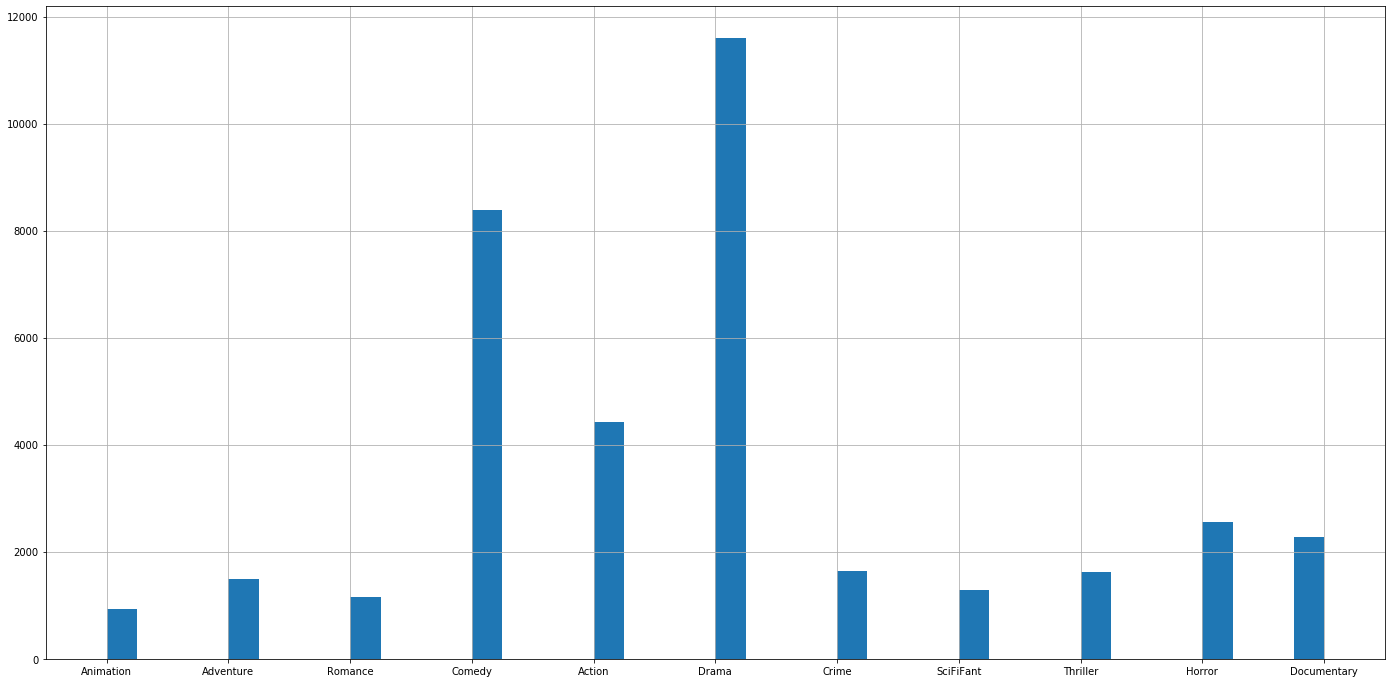

In [2795]:
# df_movies_dataset_overview_tfidf.head(20)
# df_movies_dataset.sample(200)
df_movies_dataset.genre.unique()
df_movies_dataset.genre.hist(bins=40, figsize=(24,12))
# df_movies_dataset[(df_movies_dataset.revenue != 0) & (df_movies_dataset.budget != 0)].revenue.hist(bins=40, figsize=(10,8))
# df_movies_dataset[(df_movies_dataset.budget != 0) & (df_movies_dataset.budget != 0)].revenue.hist(bins=40, figsize=(10,8))

# df_movies_dataset.lead_actor_le.plot.hist(figsize=(10,8), bins=40)

In [2796]:
# df_movies_dataset2.shape
# df_movies_dataset2[['revenue', 'Rev_div_Budget', 'lead_actor_le','runtime', 'budget']].head(10)
# df_movies_dataset_overview_tfidf.dtypes
# df_movies_dataset2.dtypes
# df_movies_dataset2.iloc[:,16:40]
# df_movies_dataset2.dtypes

In [2797]:
x = 1 # generage df_movies_dataset2, else if x == 2 then we are doing the pipeline
# print(df_movies_dataset.head(5))
X_collist = [
 'revenue'
, 'Rev_div_Budget'
 ,'lead_actor_le'
 ,'runtime'
 ,'budget'
]

if x == 1:  X = df_movies_dataset2[['revenue', 'Rev_div_Budget' ,'lead_actor_le', 'runtime','budget']]
if x == 2:  X = df_movies_dataset[[ 'revenue', 'Rev_div_Budget' ,'lead_actor_le', 'runtime','budget']]

# X = X_collist.append(list(df_movies_dataset_overview_tfidf.columns.values))
# print("hey {}".format(list(df_movies_dataset_overview_tfidf.columns.values)))

X_list = X_collist + list(df_movies_dataset_overview_tfidf.columns.values)
if x == 1:  X = df_movies_dataset2[X_list]
if x == 2:  X = df_movies_dataset[X_list]

# X_list = [['budget'] + list(df_movies_dataset_overview_tfidf.columns.values)]
print("X_list = {}".format(X_list))
# X = df_movies_dataset2[X_list]
# X = df_movies_dataset2[X_list]
if x == 1:  y = df_movies_dataset2['genre_le']
if x == 2:  y = df_movies_dataset['genre_le']

print("shape of X is {}".format(X.shape))
print("shape of y is {}".format(y.shape))

X_list = ['revenue', 'Rev_div_Budget', 'lead_actor_le', 'runtime', 'budget', 'about', 'after', 'all', 'an', 'are', 'at', 'back', 'be', 'becomes', 'been', 'begin', 'being', 'between', 'boy', 'but', 'by', 'can', 'come', 'daughter', 'day', 'death', 'during', 'fall', 'family', 'father', 'film', 'find', 'first', 'friend', 'from', 'get', 'girl', 'go', 'ha', 'have', 'he', 'help', 'her', 'him', 'himself', 'home', 'into', 'it', 'life', 'love', 'make', 'man', 'meet', 'more', 'mother', 'must', 'new', 'not', 'old', 'on', 'one', 'only', 'or', 'other', 'out', 'over', 'own', 'people', 'school', 'set', 'she', 'so', 'son', 'story', 'take', 'that', 'their', 'them', 'there', 'they', 'this', 'three', 'through', 'time', 'town', 'try', 'turn', 'two', 'up', 'wa', 'war', 'way', 'what', 'when', 'where', 'which', 'while', 'who', 'wife', 'will', 'woman', 'work', 'world', 'year', 'young']
shape of X is (37380, 105)
shape of y is (37380,)


In [2798]:
params1 = { 'lowercase': True,
            'norm': u'l2',
            'smooth_idf' :True,
#         'stop_words': 'english',
            'tokenizer': LemmaTokenizer(),
            'use_idf': True           
}

vectorizer_iterator_params = {
                              'tfidf__max_df': [0.5,0.75,1.00], 
                              'tfidf__min_df':[1,2,3,4],  
                              'tfidf__max_features': [10,50,100,150,200,300,400,500]      
}

classifier_iterator_params = {
        'n_estimators' : [100,200,300,400,500]
        
}

params2 = {
    'random_state' : RANDOM_STATE
}


#super_pipeline(X, y, params1={}, vectorizer_iterator_params={}, params2={}, classifier_iterator_params={})

In [2799]:
x = 1

if x == 0:
    #import numpy as np
    # import matplotlib.mlab as mlab
    # import matplotlib.pyplot as plt

    #fig = plt.figure()
    # plt.plot(data)
    # fig.suptitle('test title', fontsize=20)
    # plt.xlabel('xlabel', fontsize=18)
    # plt.ylabel('ylabel', fontsize=16)
    # fig.savefig('test.jpg') 

    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 8
    fig_size[1] = 6
    plt.rcParams["figure.figsize"] = fig_size

    # print(X.columns)
    for i in X.columns:
        x = X[i] #[21,22,23,4,5,6,77,8,9,10,31,32,33,34,35,36,37,18,49,50,100]
        fig = plt.figure()
        fig.suptitle(i, fontsize=20)
        num_bins = 16
        n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
        plt.show()

In [2800]:
print("X shape is {}, and y shape is {}".format(X.shape, y.shape))

X shape is (37380, 105), and y shape is (37380,)


# Random Forest Supervised Learning  
## With Genre as the label

In [2801]:
X_train, X_test, y_train, y_test = training_test_set(X, y)

2020-04-26 10:24:39: In: training_test_set In training_test_set, train_size=0.85, and test_size=0.15 

train_size = 0.85, X_train is 31773, and y_train is 31773
test_size  = 0.15, X_test  is 5607, and y_test is 5607


In [2802]:
params = {
    'n_estimators' : 500,
    'random_state' : RANDOM_STATE
}

# rfc_and_feature_importances(X, y, params=params)

In [2803]:
# x = 0

# if x == 1:
#     from https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#     from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest

#     n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#     # Number of features to consider at every split
#     max_features = ['auto', 'sqrt']
#     # Maximum number of levels in tree
#     max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#     max_depth.append(None)
#     # Minimum number of samples required to split a node
#     min_samples_split = [2, 5, 10]
#     # Minimum number of samples required at each leaf node
#     min_samples_leaf = [1, 2, 4]
#     # Method of selecting samples for training each tree
#     bootstrap = [True, False]

#     # Create the random grid
#     random_grid = {'n_estimators': n_estimators,
#                    'max_features': max_features,
#                    'max_depth': max_depth,
#                    'min_samples_split': min_samples_split,
#                    'min_samples_leaf': min_samples_leaf,
#                    'bootstrap': bootstrap}

#      Use the random grid to search for best hyperparameters
#     # First create the base model to tune
#     # rf = RandomForestRegressor()
#     rf = Ensemble.RandomForestClassifier()
#     # # Random search of parameters, using 3 fold cross validation, 
#     # # search across 100 different combinations, and use all available cores
#     rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
#     rf_random.fit(train_features, train_labels)


# Inside run_rf, parameters passed were: {'n_estimators': 500, 'random_state': 10267347}

### Training score = 100.00%

### Test score = 36.60%

###  Metrics test accuracy score = 36.60%

### Cross validation scores:  [0.37088906 0.37498033 0.37922895 0.37724268 0.37897387]

### Accuracy of Model with Cross Validation average is: 37.63%

In conf_matrix_function: y_train.shape[0]=5607

In conf_matrix_function: y_pred_class.shape[0]=5607

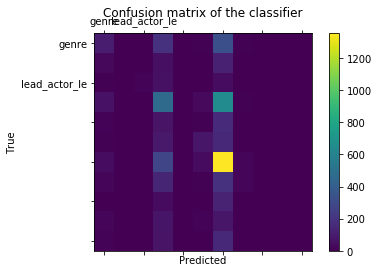

2020-04-26 10:30:05: In: run_rf End run_rfr part 1 

In [2804]:
x = 1

if x == 1:
    # Let's now run Random Forest Classification 
    params = {
        'n_estimators' : 500,
        'random_state' : RANDOM_STATE
    }


    run_rf(X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, params=params, cross_validate=True, confusion_matrix=True)

# Clustering

In [2805]:
# for col in df_movies_dataset2.columns:
#     print("columname used is {}".format(col))
df_movies_for_clustering = df_movies_dataset2
df_movies_for_clustering.drop(['id', 'overview','release_date','title','genre','lead_actor'], axis=1, inplace=True)
print("columns in df_movies_dataset are {}".format(df_movies_for_clustering.columns))

scaler = StandardScaler()
all_data = scaler.fit_transform(df_movies_for_clustering)
# df_movies_dataset.groupby(['genre']).size().count() # df_movies_dataset.info()

columns in df_movies_dataset are Index(['budget', 'revenue', 'runtime', 'Rev_div_Budget', 'lead_actor_le',
       'genre_le', 'about', 'after', 'all', 'an',
       ...
       'which', 'while', 'who', 'wife', 'will', 'woman', 'work', 'world',
       'year', 'young'],
      dtype='object', length=106)


## We are plotting the elbow method!

2020-04-26 10:30:06: In: do_the_elbow 


Begin 

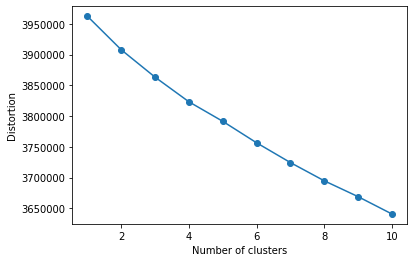

2020-04-26 10:30:59: In: do_the_elbow 


End 

y_pred is a <class 'numpy.ndarray'> data type


In [ ]:
x = 1

if x == 1: # run this baby

    do_the_elbow(all_data, maxK=11)
    print("y_pred is a {} data type".format(type(y_pred)))
    # Plot the solution.

    k_means = KMeans(n_clusters=11, random_state=RANDOM_STATE)
    %timeit k_means.fit(all_data)
    y_pred = k_means.predict(all_data)
    print("y_pred is a {} datatype.".format(type(y_pred)))
    print("the size of y_pred is {}".format(len(y_pred)))
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 10
    plt.rcParams["figure.figsize"] = fig_size

    plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
    plt.show()

    print("herer comes GMM")
#     gmm = GaussianMixture(n_components=4).fit(X)
#     labels = gmm.predict(X)
#     plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
x = 0

if x == 1:
    gm.converged_
    gm.n_iter_
    gm.predict(X)
    gm.predict_proba(X)

In [ ]:
df_movies_for_clustering.head(10)

In [ ]:
# df_movies_dataset["OverviewLength"]= df_movies_dataset["overview"].str.len()

In [ ]:
# df_movies_dataset['OverviewLength'].sample(100)

In [ ]:
# df_movies_dataset2.sample(20)

In [ ]:
x = 0

if x == 1:
#     def test_gridsearch():

    from sklearn.datasets import load_iris
    from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, VotingClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.model_selection import GridSearchCV

#     iris = datasets.load_iris()
    data = load_iris()
    print(iris.target[[10, 25, 50]])
# array([0, 0, 1])
    print(list(iris.target_names))
    #['setosa', 'versicolor', 'virginica']
    """Check GridSearch support."""
    
    clf1 = LogisticRegression(random_state=1)
    clf2 = RandomForestClassifier(random_state=1)
    clf3 = GaussianNB()
    eclf = VotingClassifier(estimators=[
                ('lr', clf1), 
                ('rf', clf2),
                ('gnb', clf3)],
                voting='soft')

    params = [
             { 'lr__C': [1.0, 100.0] },
             { 
#                'clf__min_samples_split': [2,4],
               'clf__n_estimators': [10, 100] 
             }
    ]

    grid = GridSearchCV(estimator=eclf, param_grid=params, cv=5)
    grid.fit(data.data, data.target)

    expect = [0.953, 0.960, 0.960, 0.953]
    #score1,score2 = input ("Enter two scores separated by a comma:").split(",")
    print(grid.cv_results_)
#     scores = [mean_score for params, mean_score, scores in grid.cv_results_]
#     for e, s in zip(expect, scores):
#         assert_almost_equal(e, s, decimal=3) 

In [ ]:
print(pd.__version__)

In [ ]:
# this works...
x = 0

if x == 1:
    
    def report(results, n_top=3):
        for i in range(1, n_top + 1):
            candidates = np.flatnonzero(results['rank_test_score'] == i)
            for candidate in candidates:
                print("Model with rank: {0}".format(i))
                print("Mean validation score: {0:.3f} (std: {1:.3f})"
                      .format(results['mean_test_score'][candidate],
                              results['std_test_score'][candidate]))
                print("Parameters: {0}".format(results['params'][candidate]))
                print("")

    import numpy as np

    # from sklearn.grid_search import RandomizedSearchCV
    from sklearn.model_selection import learning_curve,GridSearchCV,RandomizedSearchCV

    from sklearn.datasets import load_digits
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler    
    from sklearn.pipeline import Pipeline

    # get some data
    iris = load_digits()
    X, y = iris.data, iris.target

    param_dist = {
        'rbf_svm__C': [1, 10, 100, 1000], 
        'rbf_svm__gamma': [0.001, 0.0001], 
        'rbf_svm__kernel': ['rbf', 'linear'],
    }

    # create pipeline with a scaler 
    steps = [('scaler', StandardScaler()), ('rbf_svm', SVC())]
    pipeline = Pipeline(steps)

    # do search
    search = RandomizedSearchCV(pipeline, 
                                param_distributions=param_dist, 
                                n_iter=50)
    search.fit(X, y)

    print("Here comes the good stuff, amigo.")
    report(search.cv_results_,n_top=2)

In [ ]:
x = 0

    if x == 1:

    def report(results, n_top=3):
        for i in range(1, n_top + 1):
            candidates = np.flatnonzero(results['rank_test_score'] == i)
            for candidate in candidates:
                print("Model with rank: {0}".format(i))
                print("Mean validation score: {0:.3f} (std: {1:.3f})"
                      .format(results['mean_test_score'][candidate],
                              results['std_test_score'][candidate]))
                print("Parameters: {0}".format(results['params'][candidate]))
                print("")

    import numpy as np
    import random
    from sklearn.model_selection import learning_curve,GridSearchCV,RandomizedSearchCV
    from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
    from sklearn.datasets import load_digits
    from sklearn.svm import SVC
    from sklearn.preprocessing import StandardScaler    
    from sklearn.pipeline import Pipeline

    # get some data
    iris = load_digits()
    X, y = iris.data, iris.target

    param_dist = {
        'rfc__n_estimators' : [random.randrange(10,1000, 10) for iter in range(2)], # old value[3, 10, 30],
        'rfc__max_features' : [2, 4, 6, 8],
        'rfc__bootstrap' : [True, False]
    }

    RandomForestClassifier.set_params(params)

# create pipeline with a scaler 
    steps = [
        ('scaler', StandardScaler()), 
    #     ('rbf_svm', SVC()), 
        ('rfc', RandomForestClassifier())

    ]
    pipeline = Pipeline(steps)

    # do search
    search = RandomizedSearchCV(pipeline, 
                                param_distributions=param_dist, 
                                n_iter=16,
                                cv=5, 
                                scoring='normalized_mutual_info_score', 
                                return_train_score=True
    )
    print("this is before search, dude.")
    search.fit(X, y)

    print("\nHere comes the good stuff, amigo.\n")
    report(search.cv_results_,n_top=2)

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
class TextExtractor(BaseEstimator, TransformerMixin):
    """
    From: 
    https://stackoverflow.com/questions/55142677/sklearn-pipeline-pass-a-parameter-to-a-custom-transformer
    
    Concat the 'title', 'body' and 'code' from the results of
    Stackoverflow query
    Keys are 'title', 'body' and 'code'.
    """
    
    def __init__(self, weight = {'title' : 10, 'body': 1, 'code' : 1}):
        self.weight = weight

    def fit(self, x, y=None):
        return self

    def transform(self, x):
        x['text'] = self.weight['title']*x['Title'] + self.weight['body']*x['Body'] + self.weight['code']*x['Code']
    
        return x['text']